# Explore here

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
data = pd.read_csv(url)

# Display the first few rows
print(data.head())

# Check the data types and null values
print(data.info())
print(data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [3]:
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


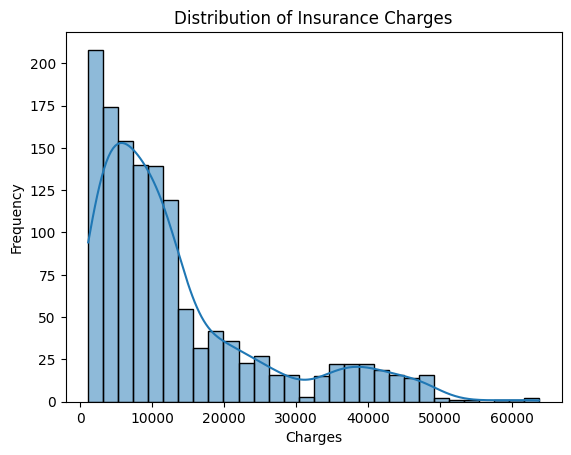

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable 'charges'
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [4]:
categorical_cols = data.select_dtypes(include=['object']).columns
encoded_categoricals = pd.get_dummies(data[categorical_cols], drop_first=True)

# Combine encoded columns 
numeric_data = data.drop(columns=categorical_cols)  # Drop categorical columns
data_encoded = pd.concat([numeric_data, encoded_categoricals], axis=1)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


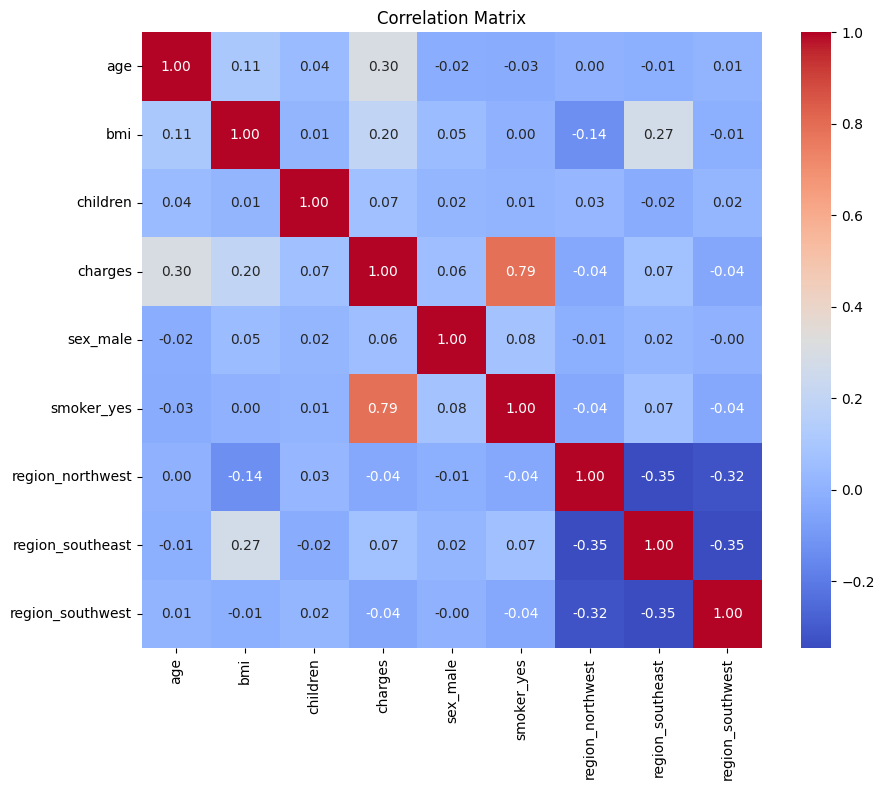

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

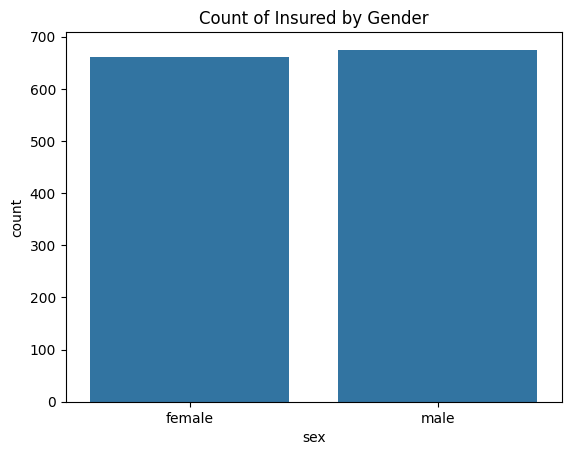

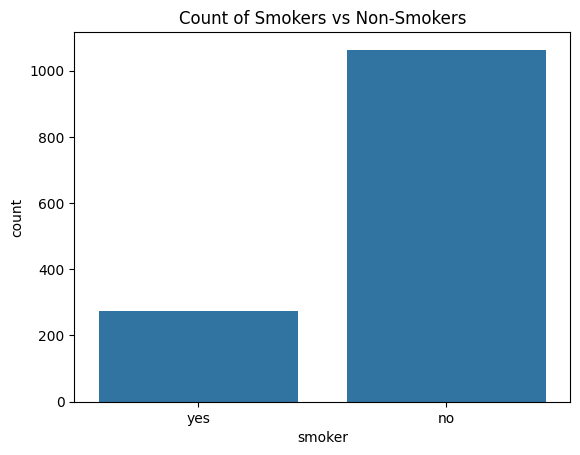

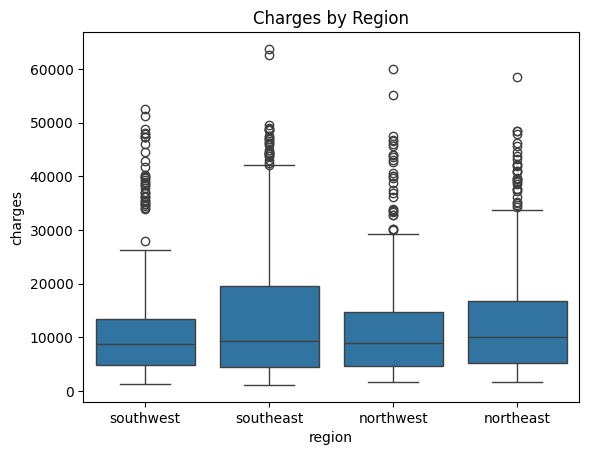

In [9]:
sns.countplot(x='sex', data=data)
plt.title('Count of Insured by Gender')
plt.show()

sns.countplot(x='smoker', data=data)
plt.title('Count of Smokers vs Non-Smokers')
plt.show()

sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'charges'
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Scale the features separately for training and testing sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.feature_selection import SelectKBest, f_regression
# Perform feature selection on the scaled training set
selection_model = SelectKBest(f_regression, k=5)
selection_model.fit(X_train_scaled, y_train)

# Get the selected columns
selected_columns = X.columns[selection_model.get_support()]

# Transform the training and testing sets based on the selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns=selected_columns)


# Display the first few rows of the selected training set

X_train_sel.head()

,age,bmi,children,smoker_yes,region_southeast
0,0.108696,0.230024,0.0,0.0,0.0
1,0.065217,0.263250,0.4,0.0,0.0
2,0.739130,0.580172,0.4,0.0,0.0
3,0.978261,0.686306,0.0,0.0,1.0
4,0.630435,0.286252,0.4,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train_sel, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test_sel)

Mean Squared Error: 35771689.939500734
R² Score: 0.8053305607835617


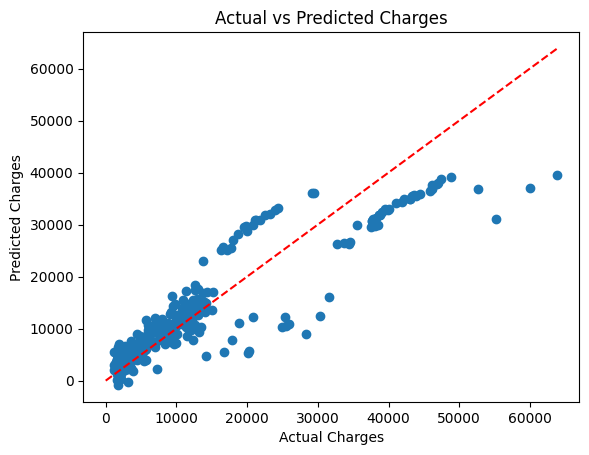

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Display actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.show()

In [15]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [16]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_yes,region_southeast,charges
0,0.108696,0.230024,0.0,0.0,0.0,2396.09590
1,0.065217,0.263250,0.4,0.0,0.0,3279.86855
2,0.739130,0.580172,0.4,0.0,0.0,33471.97189
3,0.978261,0.686306,0.0,0.0,1.0,13405.39030
4,0.630435,0.286252,0.4,0.0,0.0,9715.84100


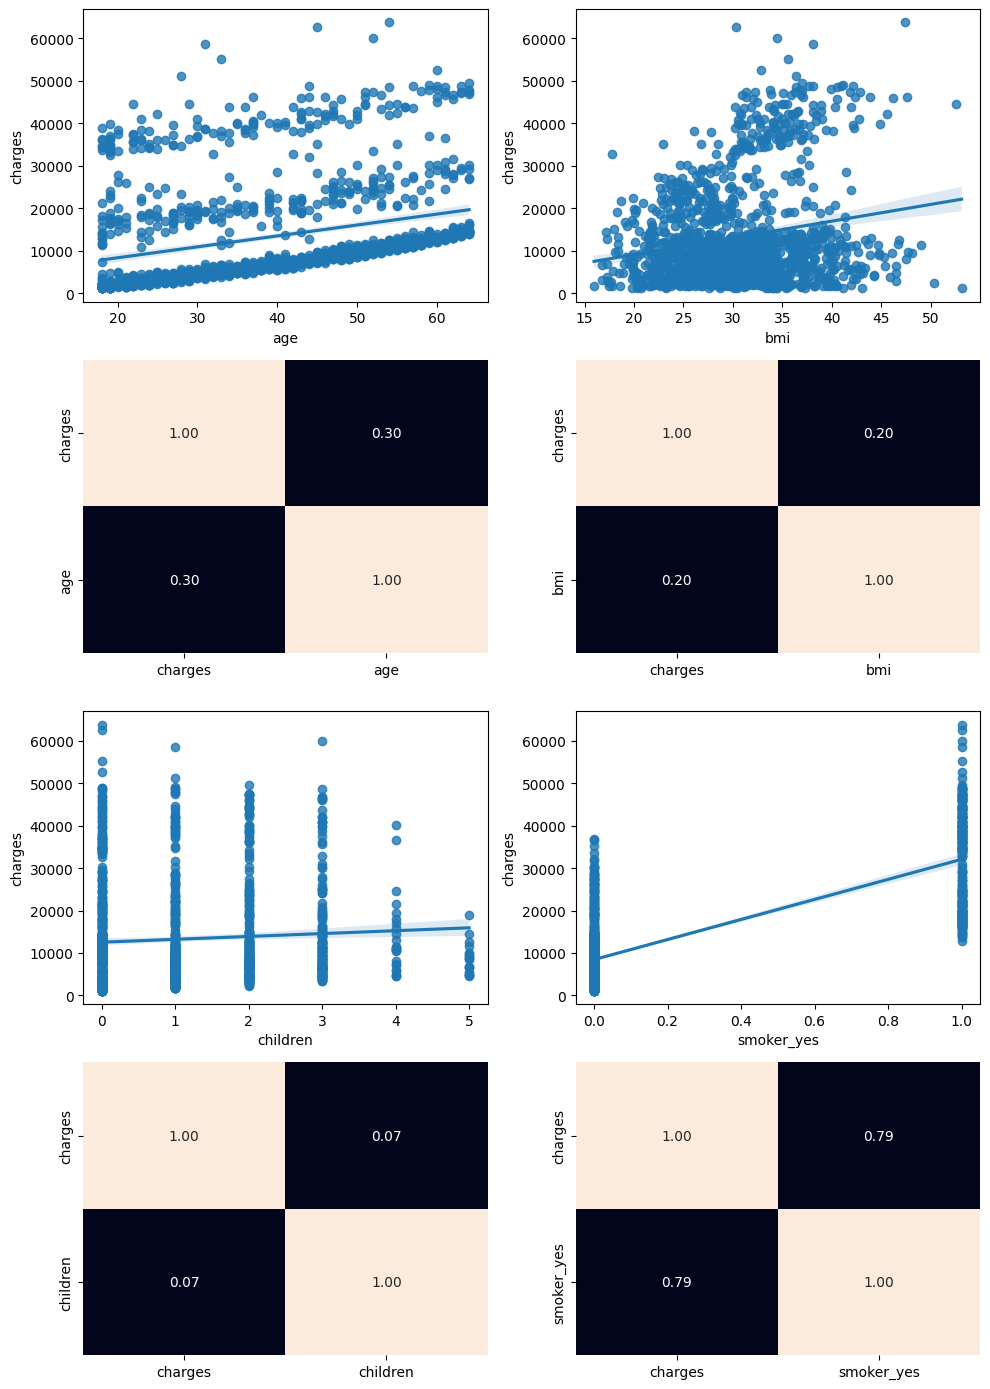

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
#totdata = pd.concat([train_data, test_data])

sns.regplot(data = data_encoded, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data_encoded[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data_encoded, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(data_encoded[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data_encoded, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(data_encoded[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = data_encoded, x = "smoker_yes", y = "charges", ax = axis[2, 1])
sns.heatmap(data_encoded[["charges", "smoker_yes"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [18]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -1899.6018343472988
Coefficients (b1, b2): [11428.81882133 11698.16870132  2670.27380931 23084.47288051
  -469.18232982]
